# **Import Datasets**

In [54]:
# Import relevenat libraries
import pandas as pd
import os
import sklearn
import numpy as np
import pandas as pd
from sklearn import tree, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
!pip install pymal h5py

  Using cached six-1.3.0-py3-none-any.whl
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
pydrive2 1.6.3 requires six>=1.13.0, but you have six 1.3.0 which is incompatible.
astunparse 1.6.3 requires six<2.0,>=1.6.1, but you have six 1.3.0 which is incompatible.
bleach 6.1.0 requires six>=1.9.0, but you have six 1.3.0 which is incompatib

In [56]:
churning_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 3/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [57]:
churning_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
churning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Relevant Features**

In [59]:
# drop id from dataframe
churning_data.drop('customerID', axis = 1, inplace = True)


In [60]:
churning2 = churning_data

In [61]:
label_encoder = LabelEncoder()

Y = churning_data['Churn'] # Move churn, the target column into a separate variable
encoded_Y = label_encoder.fit_transform(Y) # encode churn in Y
encoded_Y

array([0, 0, 1, ..., 0, 1, 0])

In [62]:
churning_data.drop('Churn', axis = 1, inplace = True) # drop churn from the dataframe
churning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [63]:
# Replace blank space in the total charges column with nan values that can be imputed
churning_data['TotalCharges'] = churning_data['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)
churning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [64]:
churning_data['TotalCharges'] = churning_data['TotalCharges'].fillna(0).astype(float) # impute the nan values in total charge column
churning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [65]:
numeric_churning_data = churning_data.select_dtypes(include=['int', 'float']).columns # separate the numeric columns
numeric_churning = churning_data[numeric_churning_data]
numeric_churning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [66]:
sc = StandardScaler() # variable for scaler

In [67]:
# scaled_numeric = sc.fit_transform(numeric_churning) # scale numeric data
# scaled_numeric_data = pd.DataFrame(scaled_numeric, columns = numeric_churning.columns) # move the scaled data into a new dataframe
# scaled_numeric_data.head(10)

In [68]:
object_churning_data = churning_data.select_dtypes(exclude=['int', 'float']).columns # select the object columns
object_churning = churning_data[object_churning_data] # move the object columns into a new variable
object_churning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
dtypes: object(15)
memory usage: 825.5+ KB


In [69]:
encoded_object = pd.DataFrame() # new dataframe for encoded data
for n in object_churning.columns:
  encoded_object[n] = label_encoder.fit_transform(object_churning[n]) # encode the data and move into the dataframe
encoded_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   Partner           7043 non-null   int64
 2   Dependents        7043 non-null   int64
 3   PhoneService      7043 non-null   int64
 4   MultipleLines     7043 non-null   int64
 5   InternetService   7043 non-null   int64
 6   OnlineSecurity    7043 non-null   int64
 7   OnlineBackup      7043 non-null   int64
 8   DeviceProtection  7043 non-null   int64
 9   TechSupport       7043 non-null   int64
 10  StreamingTV       7043 non-null   int64
 11  StreamingMovies   7043 non-null   int64
 12  Contract          7043 non-null   int64
 13  PaperlessBilling  7043 non-null   int64
 14  PaymentMethod     7043 non-null   int64
dtypes: int64(15)
memory usage: 825.5 KB


In [70]:
# scaled_object = sc.fit_transform(encoded_object) # scale the object data
# scaled_object_data = pd.DataFrame(encoded_object, columns = encoded_object.columns) # move the scaled data into the dataframe
# scaled_object_data.head(10)

In [71]:
X = pd.DataFrame() # new dataframe for features
X = pd.concat([encoded_object, numeric_churning], axis = 1) # combine the numeric and object data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   PhoneService      7043 non-null   int64  
 4   MultipleLines     7043 non-null   int64  
 5   InternetService   7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   OnlineBackup      7043 non-null   int64  
 8   DeviceProtection  7043 non-null   int64  
 9   TechSupport       7043 non-null   int64  
 10  StreamingTV       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  SeniorCitizen     7043 non-null   int64  
 16  tenure            7043 non-null   int64  


In [72]:
X.head(5)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,2,70.70,151.65


In [73]:
rf = RandomForestClassifier(n_estimators=100, random_state=42) # variable for random forest classifier

In [74]:
rf.fit(X, Y)

RandomForestClassifier(random_state=42)

In [75]:
feature_name = X.columns
feature_importance = rf.feature_importances_ # feature importance

In [76]:
sorted_feature_importance = pd.DataFrame({'Feature':feature_name,'Importance':feature_importance}) # dataframe with feature importance
sorted_feature_importance = sorted_feature_importance.sort_values(by='Importance', ascending=False) # features sorted in order of importance
sorted_feature_importance

,Feature,Importance
18,TotalCharges,0.195330
17,MonthlyCharges,0.180963
16,tenure,0.152855
12,Contract,0.075647
14,PaymentMethod,0.049820
9,TechSupport,0.048917
6,OnlineSecurity,0.045232
0,gender,0.027495
5,InternetService,0.026148
7,OnlineBackup,0.025921


In [77]:
first_eleven_features = sorted_feature_importance['Feature'].values[:11] # first eleven most important features
first_eleven_features

array(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
       'PaymentMethod', 'TechSupport', 'OnlineSecurity', 'gender',
       'InternetService', 'OnlineBackup', 'DeviceProtection'],
      dtype=object)

In [78]:
X = X[first_eleven_features]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TotalCharges      7043 non-null   float64
 1   MonthlyCharges    7043 non-null   float64
 2   tenure            7043 non-null   int64  
 3   Contract          7043 non-null   int64  
 4   PaymentMethod     7043 non-null   int64  
 5   TechSupport       7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   gender            7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 605.4 KB


In [79]:
# scaled_numeric = sc.fit_transform(numeric_churning) # scale numeric data
# scaled_numeric_data = pd.DataFrame(scaled_numeric, columns = numeric_churning.columns) # move the scaled data into a new dataframe
# scaled_numeric_data.head(10)

In [80]:
Scaled_X = sc.fit_transform(X)
Scaled_X = pd.DataFrame(Scaled_X, columns = X.columns)
X.head(10)

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,TechSupport,OnlineSecurity,gender,InternetService,OnlineBackup,DeviceProtection
0,29.85,29.85,1,0,2,0,0,0,0,2,0
1,1889.50,56.95,34,1,3,0,2,1,0,0,2
2,108.15,53.85,2,0,3,0,2,1,0,2,0
3,1840.75,42.30,45,1,0,2,2,1,0,0,2
4,151.65,70.70,2,0,2,0,0,0,1,0,0
5,820.50,99.65,8,0,2,0,0,0,1,0,2
6,1949.40,89.10,22,0,1,0,0,1,1,2,0
7,301.90,29.75,10,0,3,0,2,0,0,0,0
8,3046.05,104.80,28,0,2,2,0,0,1,0,2
9,3487.95,56.15,62,1,0,0,2,1,0,2,0


# **Exploratory Data Analysis**

In [81]:
import seaborn as sb

In [82]:
features_to_drop = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'] # list of non relevant features
object_churning.drop(features_to_drop, axis = 1, inplace = True) # drop the features from the dataframe since they are not relevant features
object_churning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   InternetService   7043 non-null   object
 2   OnlineSecurity    7043 non-null   object
 3   OnlineBackup      7043 non-null   object
 4   DeviceProtection  7043 non-null   object
 5   TechSupport       7043 non-null   object
 6   Contract          7043 non-null   object
 7   PaymentMethod     7043 non-null   object
dtypes: object(8)
memory usage: 440.3+ KB


<ipython-input-82-e1026f7cbd70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_churning.drop(features_to_drop, axis = 1, inplace = True) # drop the features from the dataframe since they are not relevant features


In [83]:
numeric_churning.drop('SeniorCitizen', axis = 1, inplace = True) # drop Senior Citizen from the dataframe since it is not a relevant feature
numeric_churning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


<ipython-input-83-3c7688bdf07f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_churning.drop('SeniorCitizen', axis = 1, inplace = True) # drop Senior Citizen from the dataframe since it is not a relevant feature


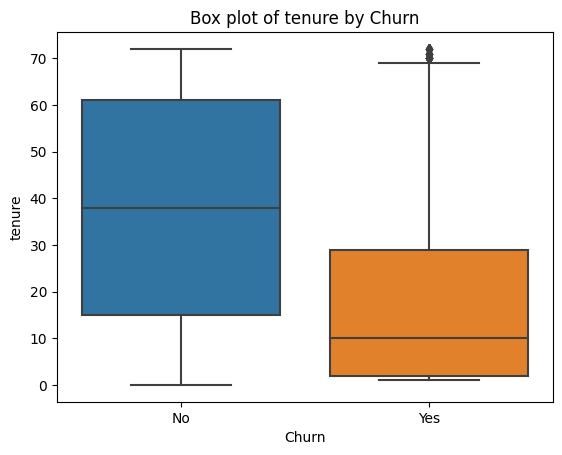

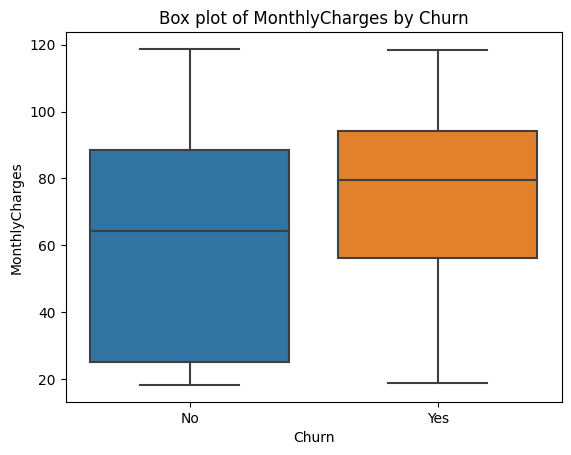

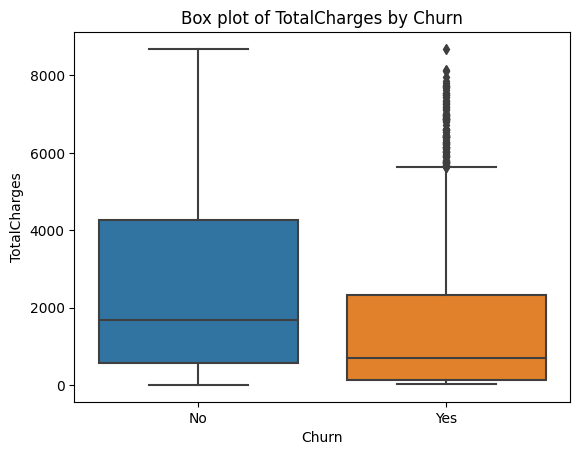

In [84]:
for i in numeric_churning:
  sb.boxplot(x= Y, y = i, data = numeric_churning)
  plt.title(f'Box plot of {i} by Churn')
  plt.show()

For the boxplot


*   The median total charges for people churning is around 500 while that of those not churning is closer to 2000
*   For monthly charges the meadian is slighlty higher than 60 for those not churning and about 75 for those churning
*   The medain tenure for customers churning is 10 while that of those not churning is 40




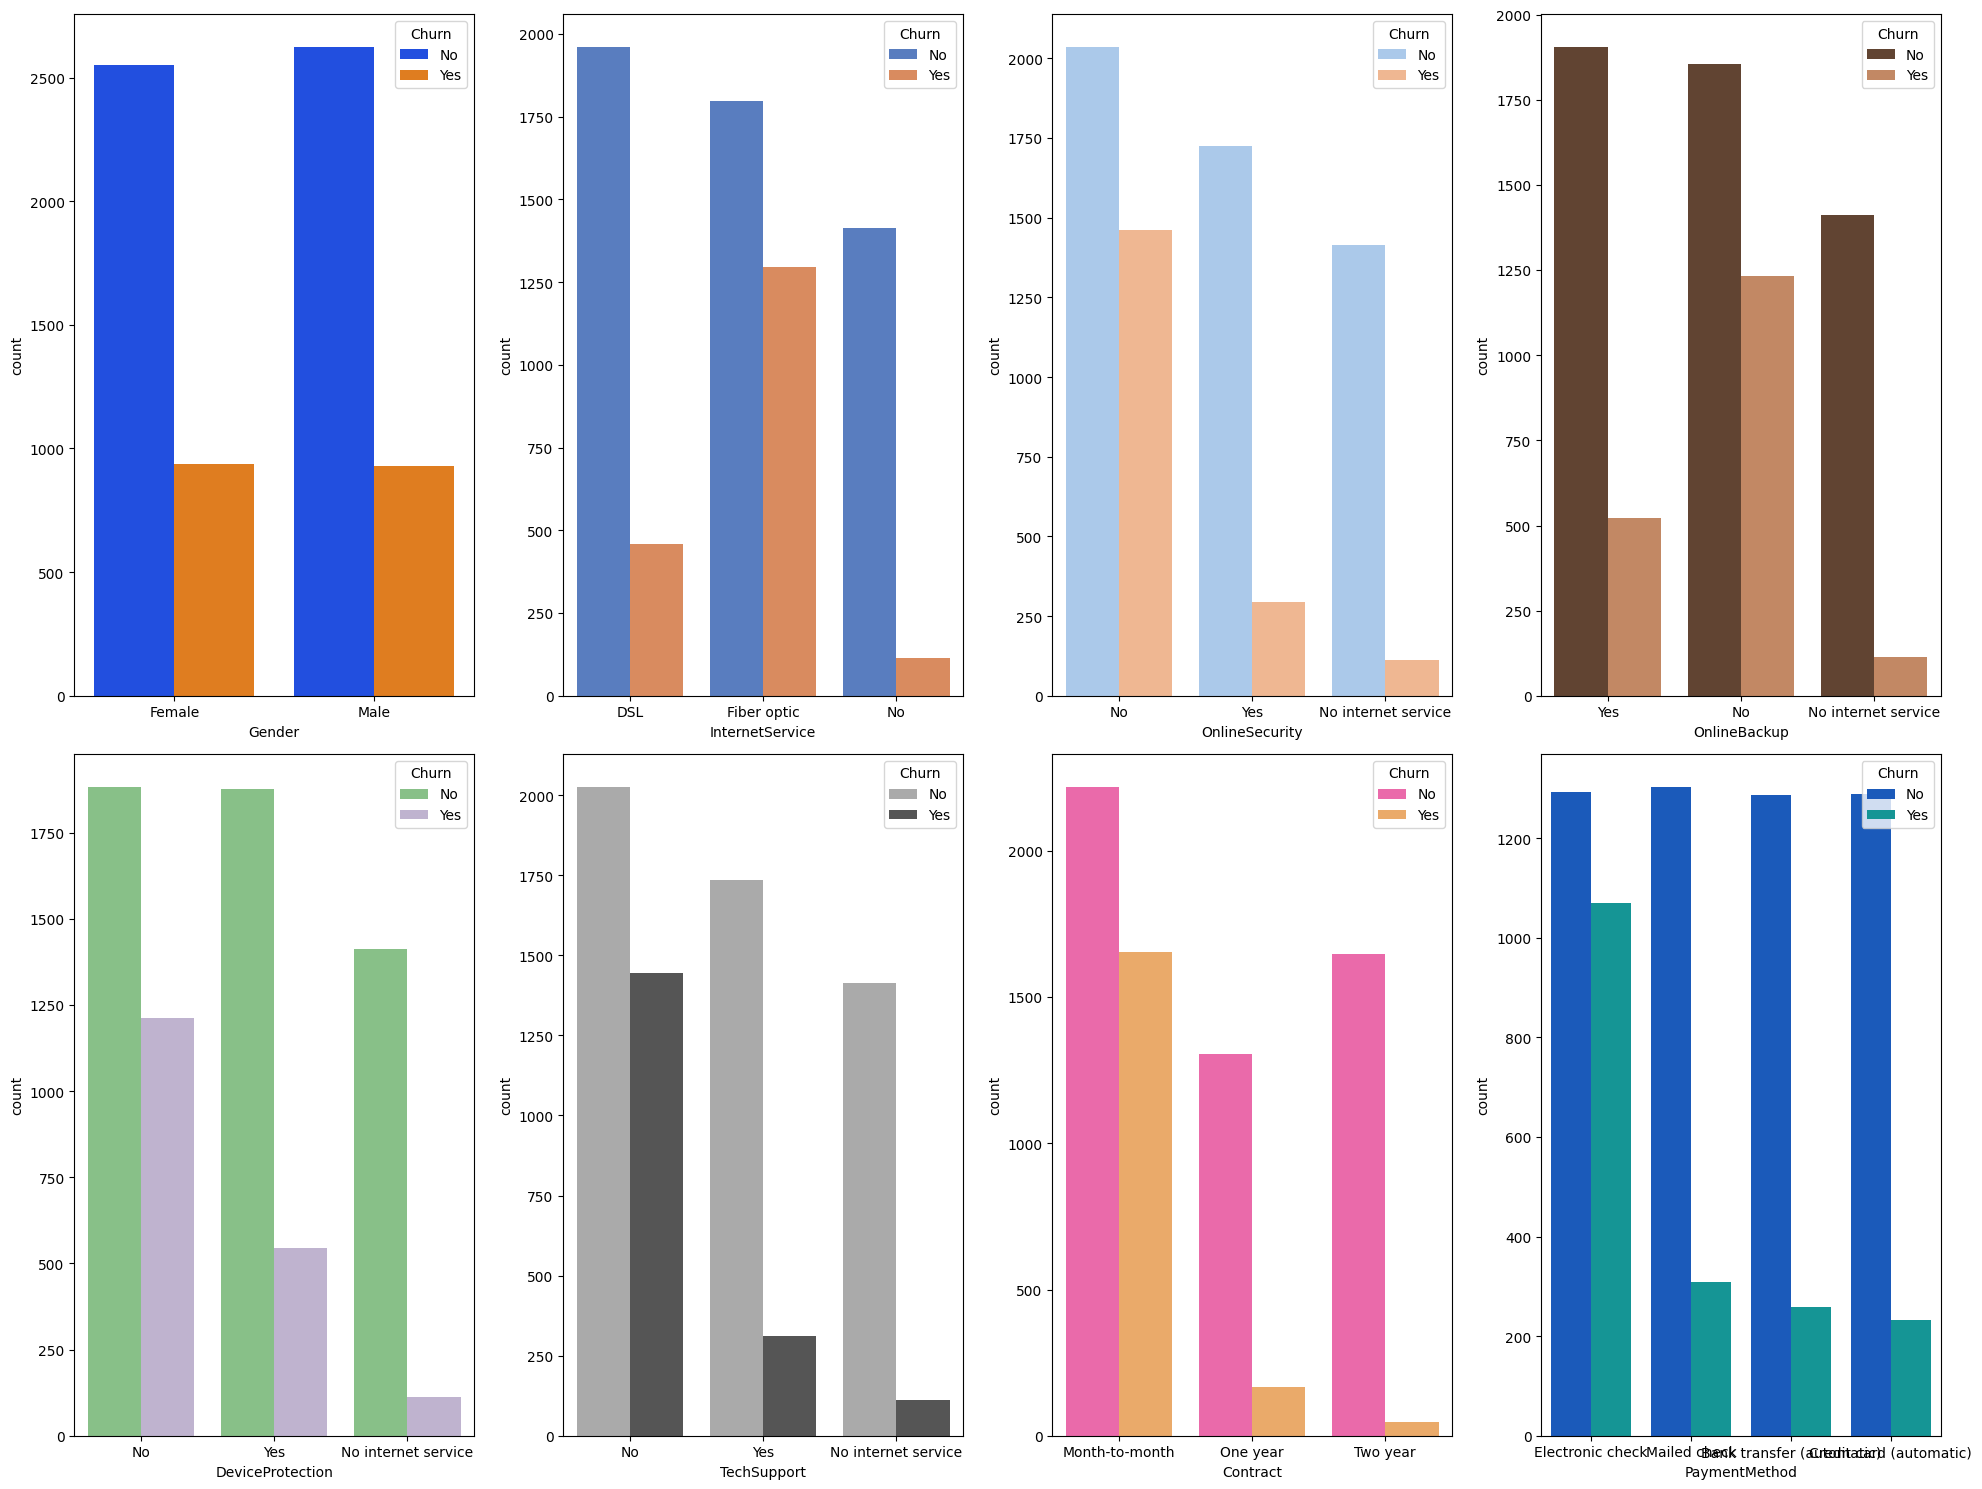

In [85]:
figure, axis = plt.subplots(2,4, figsize = (20,15))
sb.countplot(x= 'gender', data = object_churning, hue = Y, ax = axis[0,0], palette = 'bright').set(xlabel = 'Gender')
sb.countplot(x= 'InternetService', data = object_churning, hue = Y, ax = axis[0,1], palette = 'muted').set(xlabel = 'InternetService')
sb.countplot(x= 'OnlineSecurity', data = object_churning, hue = Y, ax = axis[0,2], palette = 'pastel').set(xlabel = 'OnlineSecurity')
sb.countplot(x= 'OnlineBackup', data = object_churning, hue = Y, ax = axis[0,3], palette = 'copper').set(xlabel = 'OnlineBackup')
sb.countplot(x= 'DeviceProtection', data = object_churning, hue = Y, ax = axis[1,0], palette = 'Accent').set(xlabel = 'DeviceProtection')
sb.countplot(x= 'TechSupport', data = object_churning, hue = Y, ax = axis[1,1], palette = 'binary').set(xlabel = 'TechSupport')
sb.countplot(x= 'Contract', data = object_churning, hue = Y, ax = axis[1,2], palette = 'spring').set(xlabel = 'Contract')
sb.countplot(x= 'PaymentMethod', data = object_churning, hue = Y, ax = axis[1,3], palette = 'winter').set(xlabel = 'PaymentMethod')
plt.tight_layout()
plt.show()

From the graphs


*   There isn't a significant difference between churn for males and females. The males churns slightly less than the women
*   Customers with access to fiber optics churn significantly more than those with DSL and those with no internet service churn the least
*  Customers with no online security, backup and device protection churn far more than with online security.
*   Customers that are unable to utilise tech support churn much more than those that do have access to tech support
*   Customers with a month to month contract seem to churn a lot then there is a drastic decrease in churning for the one year contract with people with a two year contract churning very little
*   Customers who pay by electronic checks churn more than those who use mailed checks followeed by transfers and credit and debit cards.





# **Artificial neural network training and testing**

In [86]:
import keras
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [87]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, encoded_Y, test_size=0.2, random_state=42)
Xvalidate, Xtest, Yvalidate, Ytest = train_test_split(Xtest, Ytest, test_size = 0.5, random_state = 42)

In [88]:
Xtrain.shape

(5634, 11)

In [89]:
Ytrain.shape

(5634,)

In [90]:
# Functional API model
input_layer = Input(shape=(Xtrain.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
hidden_layer_4 = Dense(12, activation='relu')(hidden_layer_3)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_4)
functional_model = Model(inputs=input_layer, outputs=output_layer)

In [91]:
functional_model.compile(optimizer=Adadelta(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
functional_model.fit(Xtrain, Ytrain, epochs=70, batch_size=32, validation_data=(Xvalidate, Yvalidate), verbose= 1) # define the model

Epoch 1/70
177/177 [==============================] - 2s 4ms/step - loss: 30.0171 - accuracy: 0.2492 - val_loss: 26.5662 - val_accuracy: 0.2358
Epoch 2/70
177/177 [==============================] - 1s 4ms/step - loss: 24.3428 - accuracy: 0.2496 - val_loss: 20.8006 - val_accuracy: 0.2344
Epoch 3/70
177/177 [==============================] - 1s 3ms/step - loss: 18.2109 - accuracy: 0.2499 - val_loss: 14.5434 - val_accuracy: 0.2358
Epoch 4/70
177/177 [==============================] - 1s 3ms/step - loss: 11.7263 - accuracy: 0.2497 - val_loss: 8.2368 - val_accuracy: 0.2344
Epoch 5/70
177/177 [==============================] - 1s 3ms/step - loss: 5.1620 - accuracy: 0.2732 - val_loss: 1.9260 - val_accuracy: 0.3920
Epoch 6/70
177/177 [==============================] - 1s 3ms/step - loss: 0.8116 - accuracy: 0.6138 - val_loss: 0.5901 - val_accuracy: 0.7159
Epoch 7/70
177/177 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.7157 - val_loss: 0.5838 - val_accuracy: 0.7173

In [92]:
_, accuracy = functional_model.evaluate(Xtrain, Ytrain)
accuracy*100

177/177 [==============================] - 1s 3ms/step - loss: 0.5018 - accuracy: 0.7478


74.77813363075256

In [93]:

loss, accuracy = functional_model.evaluate(Xtest, Ytest)
print(f'Test Loss: {loss:.4f}') # model loss function
print(f'Test Accuracy: {accuracy*100:.4f}') # model accuracy

23/23 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.7518
Test Loss: 0.4705
Test Accuracy: 75.1773


In [94]:
Ypred = functional_model.predict(Xtest)

23/23 [==============================] - 0s 1ms/step


In [95]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Ytest, Ypred) # AUC for model without grid search
auc

0.7934354735119233

In [96]:
!pip install tensorflow scikeras scikit-learn

  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: six
    Found existing installation: six 1.3.0
    Uninstalling six-1.3.0:
      Successfully uninstalled six-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
pymal 0.6 requires six==1.3, but you have six 1.16.0 which is incompatible.
yfinance 0.2.31 requires html5lib>=1.1, but you have html5lib 0.999999999 which is incompatible.


In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from sklearn.datasets import make_classification
import joblib
import pickle

In [98]:
def model_create(hidden_units = 32, optimizer = 'adam' ):
  input_layer = Input(shape=(Xtrain.shape[1],))
  hidden_layer1 = Dense(hidden_units, activation = 'relu')(input_layer)
  hidden_layer2 = Dense(32, activation = 'relu')(hidden_layer1)
  hidden_layer3 = Dense(32, activation = 'relu')(hidden_layer2)
  output_layer = Dense(1,activation = 'sigmoid')(hidden_layer3)
  functional_model = Model(inputs = input_layer, outputs = output_layer)
  functional_model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return functional_model

In [99]:
functional_model = KerasClassifier(model = model_create, epochs = 10, batch_size = 32, verbose = True, hidden_units = 32)

In [100]:
PARAMETERS = {
    'optimizer': ['rmsprop', 'adam'],
    'random_state': [28, 32, 64],
    'batch_size': [28, 32, 64]
}

In [101]:
cv = StratifiedKFold(n_splits = 5)
functional_cv = GridSearchCV(estimator = functional_model, param_grid= PARAMETERS, cv = cv, scoring = 'accuracy')
result = functional_cv.fit(Xtrain, Ytrain,  validation_data = (Xvalidate,  Yvalidate), verbose = 1)

Epoch 1/10
161/161 [==============================] - 2s 5ms/step - loss: 2.9885 - accuracy: 0.6818 - val_loss: 0.8152 - val_accuracy: 0.7798
Epoch 2/10
161/161 [==============================] - 0s 2ms/step - loss: 1.1469 - accuracy: 0.7207 - val_loss: 0.6331 - val_accuracy: 0.6506
Epoch 3/10
161/161 [==============================] - 0s 3ms/step - loss: 1.6946 - accuracy: 0.7173 - val_loss: 0.5239 - val_accuracy: 0.7670
Epoch 4/10
161/161 [==============================] - 0s 3ms/step - loss: 1.1201 - accuracy: 0.7269 - val_loss: 1.6730 - val_accuracy: 0.5099
Epoch 5/10
161/161 [==============================] - 1s 4ms/step - loss: 1.0420 - accuracy: 0.7391 - val_loss: 0.5837 - val_accuracy: 0.7912
Epoch 6/10
161/161 [==============================] - 1s 7ms/step - loss: 1.1640 - accuracy: 0.7360 - val_loss: 0.8484 - val_accuracy: 0.7812
Epoch 7/10
161/161 [==============================] - 1s 4ms/step - loss: 0.9680 - accuracy: 0.7371 - val_loss: 2.0910 - val_accuracy: 0.7727
Epoch 

In [102]:
print('Best accuracy: %f using %s' % (functional_cv.best_score_, functional_cv.best_params_))

Best accuracy: 0.787184 using {'batch_size': 32, 'optimizer': 'rmsprop', 'random_state': 28}


In [103]:
Ypred = functional_cv.predict(Xtest)
Ypred

23/23 [==============================] - 0s 2ms/step


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [104]:
accuracy_score(Ytest, Ypred) # accuracy for the model with Grid Search

0.7943262411347518

In [105]:
auc = roc_auc_score(Ytest, Ypred) # AUC model for the model with Grid Search
auc

0.6740319472931817

# **Exporting model, scalar and encoder**

In [106]:
func_model = model_create(28, 'rmsprop') # export functional model
func_model.save('func_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [107]:
with open('scalar.pkl', 'wb') as file: # export scalar
  pickle.dump(sc, file)

In [108]:
with open('encoder.pkl', 'wb') as file: # export encoder
  pickle.dump(label_encoder, file)